## Superdense coding

### Quantum Circuit

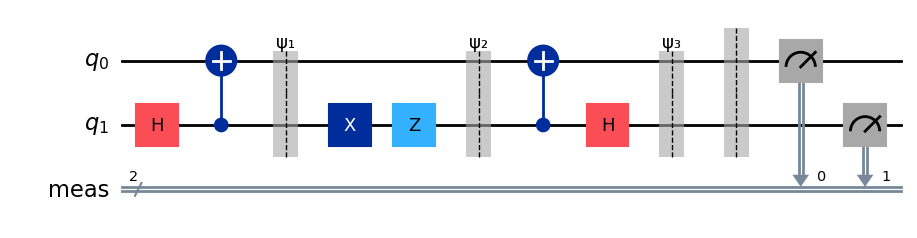

In [4]:
from qiskit import QuantumCircuit
message = "11"

circuit = QuantumCircuit(2)
circuit.h(1)
circuit.cx(1,0)
circuit.barrier(label="ψ₁")

if message[1] == "1":
    circuit.x(1)
if message[0] == "1":
    circuit.z(1)
circuit.barrier(label="ψ₂")

circuit.cx(1,0)
circuit.h(1)
circuit.barrier(label="ψ₃")

circuit.measure_all()
circuit.draw("mpl", style="iqp")

$ 
\begin{align}
\ket{\psi_1} &= C_1X_0H_1 \biggl[ \ket{0} \otimes \ket{0} \biggr] \\
&= C_1X_0 \biggl[ \ket{0} \otimes \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} + \ket{1} \biggr) \biggr) \biggr] \\
&= C_1X_0 \biggl[  \frac{1}{\sqrt{2}} \biggl( \ket{00} + \ket{01} \biggr) \biggr] \\
&= \frac{1}{\sqrt{2}} \biggl( \ket{00} + \ket{11} \biggr) \\ \\
\ket{\psi_2} &= Z_1X_1 \ket{\psi_1} \\
&= Z_1X_1 \biggl[ \frac{1}{\sqrt{2}} \biggl( \ket{00} + \ket{11} \biggr) \biggr] \\
&= Z_1 \biggl[ \frac{1}{\sqrt{2}} \biggl( \ket{01} + \ket{10} \biggr) \biggr] \\
&= \frac{1}{\sqrt{2}} \biggl( - \ket{01} + \ket{10} \biggr) \\ \\
\ket{\psi_3} &= H_1 C_1X_0 \ket{\psi_2} \\
&= H_1 C_1X_0 \biggl[ \frac{1}{\sqrt{2}} \biggl( \ket{10} - \ket{01} \biggr) \biggr] \\
&= H_1 \biggl[ \frac{1}{\sqrt{2}} \biggl( \ket{10} - \ket{11} \biggr) \biggr] \\
&= \frac{1}{\sqrt{2}} \biggl( \biggl( \ket{1} \otimes \biggl( \frac{\ket{0} + \ket{1}}{\sqrt{2}} \biggr) - \ket{1} \otimes \biggl( \frac{\ket{0} - \ket{1}}{\sqrt{2}} \biggr) \biggr) \biggr) \\
&= \frac{1}{\sqrt{2}} \biggl( \frac{\ket{10} + \ket{11}}{\sqrt{2}} - \frac{\ket{10} - \ket{11}}{\sqrt{2}} \biggr) \\
&= \frac{1}{\sqrt{2}} \biggl( \frac{\ket{10} + \ket{11} - \ket{10 + \ket{11}}}{\sqrt{2}} \biggr) \\
&= \ket{11}
\end{align}
$

### Execution on a quantum simulator

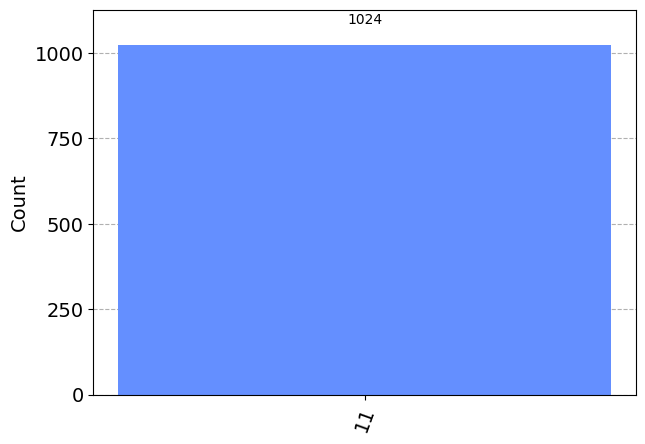

In [5]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend("aer_simulator")
transpiled_circuit = transpile(circuit, simulator)
counts = simulator.run(transpiled_circuit).result().get_counts()
plot_histogram(counts)

### Execution on a quantum computer

Job Status: job has successfully run


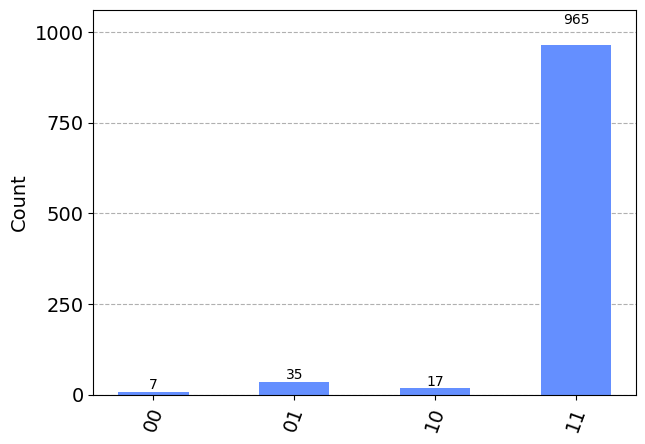

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
import os

service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ["IBM_QUANTUM_TOKEN"])
backend = service.least_busy(operational=True, min_num_qubits=2, simulator=False)
transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit, shots=1024)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table